In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Our Variables

In [3]:
twotup_cols = [    
    'fwd_qt_pkt',
    'fwd_qt_pkt_tcp',
    'fwd_qt_pkt_udp',
    'fwd_qt_pkt_icmp',
    'fwd_qt_pkt_ip',
    'fwd_qt_prtcl',
    'fwd_qt_src_prt',
    'fwd_qt_dst_prt',
    'fwd_qt_fin_fl',
    'fwd_qt_syn_fl',
    'fwd_qt_res_fl',
    'fwd_qt_psh_fl',
    'fwd_qt_ack_fl',
    'fwd_qt_urg_fl',
    'fwd_qt_ecn_fl',
    'fwd_qt_cwr_fl',
    'fwd_avg_hdr_len',
    'fwd_avg_pkt_len',
    'fwd_frq_pkt',
    'fwd_avg_ttl',
    'bck_qt_pkt',
    'bck_qt_pkt_tcp',
    'bck_qt_pkt_udp',
    'bck_qt_pkt_icmp',
    'bck_qt_pkt_ip',
    'bck_qt_prtcl',
    'bck_qt_src_prt',
    'bck_qt_dst_prt',
    'bck_qt_fin_fl',
    'bck_qt_syn_fl',
    'bck_qt_res_fl',
    'bck_qt_psh_fl',
    'bck_qt_ack_fl',
    'bck_qt_urg_fl',
    'bck_qt_ecn_fl',
    'bck_qt_cwr_fl',
    'bck_avg_hdr_len',
    'bck_avg_pkt_len',
    'bck_frq_pkt',
    'bck_avg_ttl',
    'tm_dur_s',
]

In [4]:
len(twotup_cols)

41

In [8]:
fivetup_cols = [
    'fwd_qt_pkt',
    'fwd_qt_fin_fl',
    'fwd_qt_syn_fl',
    'fwd_qt_res_fl',
    'fwd_qt_psh_fl',
    'fwd_qt_ack_fl',
    'fwd_qt_urg_fl',
    'fwd_qt_ecn_fl',
    'fwd_qt_cwr_fl',
    'fwd_avg_hdr_len',
    'fwd_avg_pkt_len',
    'fwd_max_pkt_len',
    'fwd_min_pkt_len',
    'fwd_frq_pkt',
    'fwd_avg_ttl',
    'bck_qt_pkt',
    'bck_qt_fin_fl',
    'bck_qt_syn_fl',
    'bck_qt_res_fl',
    'bck_qt_psh_fl',
    'bck_qt_ack_fl',
    'bck_qt_urg_fl',
    'bck_qt_ecn_fl',
    'bck_qt_cwr_fl',
    'bck_avg_hdr_len',
    'bck_avg_pkt_len',
    'bck_max_pkt_len',
    'bck_min_pkt_len',
    'bck_frq_pkt',
    'bck_avg_ttl',
    'tm_dur_s',
]

In [9]:
len(fivetup_cols)

31

In [10]:
cols = ['flow_key', 'lst_timestamp', 'label'] + \
       ['tt_' + x for x in twotup_cols] + \
       ['ft_' + x for x in fivetup_cols]

In [11]:
len(cols)

75

In [12]:
pd.set_option('display.max_columns', 100)

In [13]:
!ls anubis_dados

feitos			      flow_features_DrDoS_SNMP.csv  teste
flow_features_DrDoS_LDAP.csv  pesado


In [21]:
datasets = glob.glob("anubis_dados/*.csv")

In [22]:
for i in datasets:
    print(i[27:-4])

Syn
DrDoS_UDP
DrDoS_MSSQL
DrDoS_SSDP
UDPLag
DrDoS_NetBIOS
DrDoS_NTP
DrDoS_DNS
DrDoS_SNMP
DrDoS_LDAP


In [16]:
def calculate_corr(data,y,path):
    pearson_corr = dict()
    for col in data.columns[3:]:
        X = data[col]
        corr = np.corrcoef(X, y)[0, 1]
        pearson_corr[col] = 0 if np.isnan(corr) else corr
    sorted_items = sorted(pearson_corr.items(), key=lambda x: abs(x[1]), reverse=True)
    names = [x[0] for x in sorted_items]
    corrs = [abs(x[1]) for x in sorted_items]
    signs = ['Negative' if x[1] < 0 else 'Positive' for x in sorted_items]
    n_vars = 25
    plt.figure(figsize=(8, 5))
    plt.title('Pearson Correlation with the Target '+  path[27:-4]+ ' Attack - AnubisFlow')
    sns.barplot(x=names[:n_vars], y=corrs[:n_vars], hue=signs[:n_vars], dodge=False)
    plt.xticks(rotation=90)
    plt.ylim([0, 1])
    plt.savefig('./plots/'+ path[27:-4]+'.png', bbox_inches = "tight")

DrDoS_SNMP


/home/barzilay/git/tutorial_nlp/.venv_tutorial/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/barzilay/git/tutorial_nlp/.venv_tutorial/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


DrDoS_LDAP


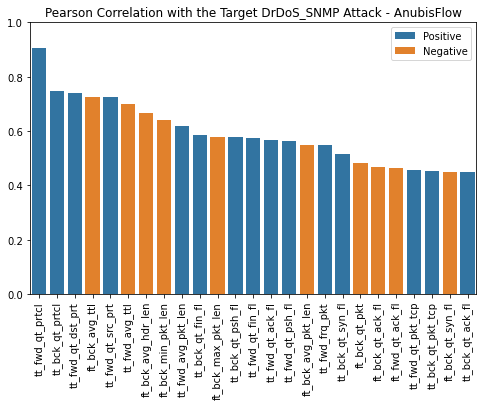

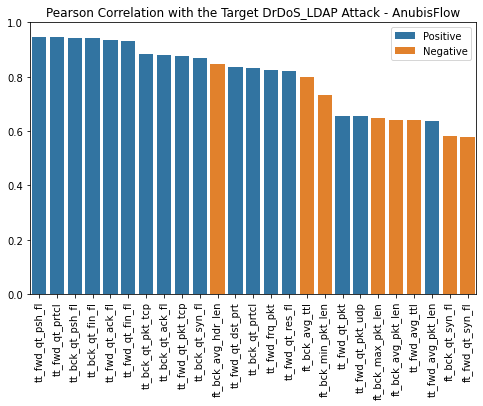

In [18]:
 for dataset_path in datasets:
    data = pd.read_csv(dataset_path, sep=";", names=cols)
    y = (data.label != 'BENIGN') * 1
    print(dataset_path[27:-4])
    calculate_corr(data, y, dataset_path)

## CICFlowMeter Variables

In [2]:
!ls anubis_dados/01-12/
datasets = glob.glob("anubis_dados/01-12/*.csv")

DrDoS_DNS.csv	DrDoS_NTP.csv	feitos	Syn.csv
DrDoS_LDAP.csv	DrDoS_SNMP.csv	grande


In [3]:
datasets[1][19:-4]

'Syn'

In [4]:
def calculate_corr_cicflow(data,y,path):   
    pearson_corr = dict()
    for col in data.columns[8:-3]:
        #print(col)
        X = data[col]
        corr = np.corrcoef(X, y)[0, 1]
        pearson_corr[col] = 0 if np.isnan(corr) else corr
    sorted_items = sorted(pearson_corr.items(), key=lambda x: abs(x[1]), reverse=True)
    names = [x[0].strip() for x in sorted_items]
    corrs = [abs(x[1]) for x in sorted_items]
    signs = ['Negative' if x[1] < 0 else 'Positive' for x in sorted_items]
    n_vars = 25
    plt.figure(figsize=(8, 5))
    plt.title('Pearson Correlation with the Target '+  path[19:-4]+ ' Attack - CICFlowMeter')
    sns.barplot(x=names[:n_vars], y=corrs[:n_vars], hue=signs[:n_vars], dodge=False)
    plt.ylim([0, 1])
    plt.xticks(rotation=90)
    plt.savefig('./plots/pearson_cicvars'+ path[19:-4] +'.png', bbox_inches = "tight")

anubis_dados/01-12/DrDoS_DNS.csv


/home/barzilay/git/tutorial_nlp/.venv_tutorial/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


carreguei
fiz mascara pro target


/home/barzilay/git/tutorial_nlp/.venv_tutorial/lib/python3.8/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/home/barzilay/git/tutorial_nlp/.venv_tutorial/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/barzilay/git/tutorial_nlp/.venv_tutorial/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


salvei grafico

anubis_dados/01-12/Syn.csv
carreguei
fiz mascara pro target
salvei grafico

anubis_dados/01-12/DrDoS_SNMP.csv
carreguei
fiz mascara pro target
salvei grafico

anubis_dados/01-12/DrDoS_LDAP.csv
carreguei
fiz mascara pro target
salvei grafico

anubis_dados/01-12/DrDoS_NTP.csv
carreguei
fiz mascara pro target
salvei grafico



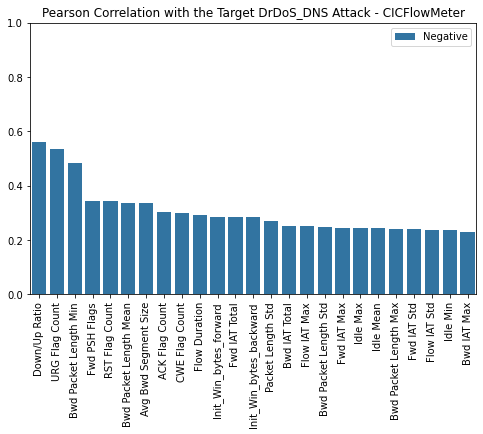

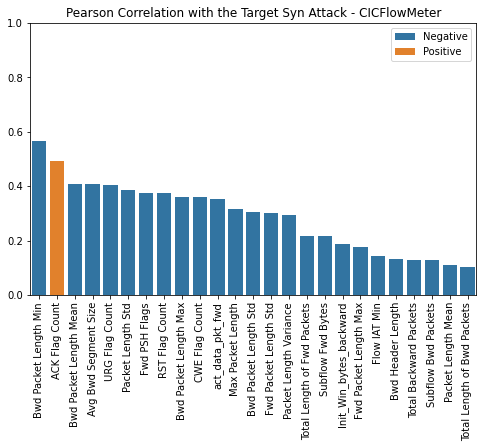

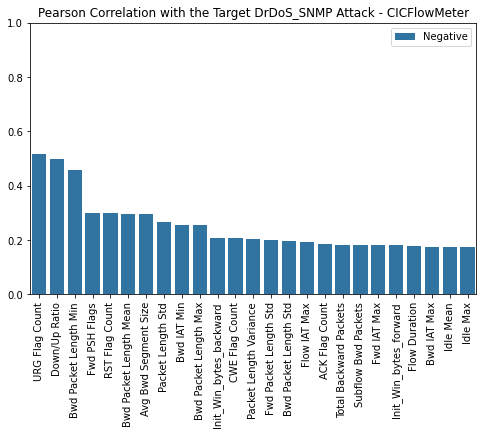

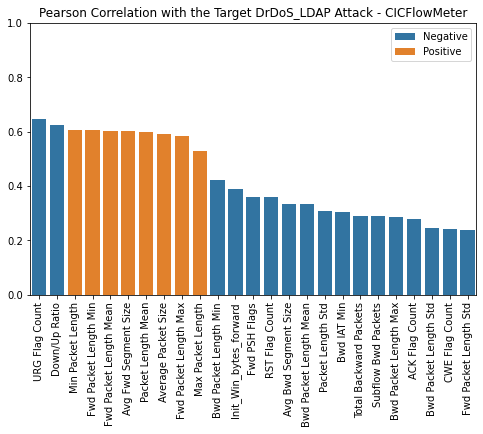

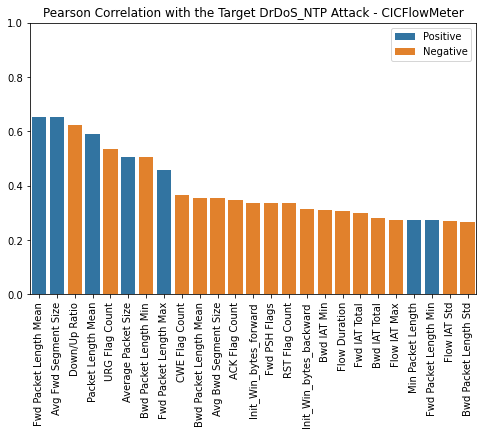

In [5]:
for dataset_path in datasets:
    print(dataset_path)
    data = pd.read_csv(dataset_path)
    print("carreguei")
    y = (data.iloc[:, -1] != 'BENIGN') * 1
    print("fiz mascara pro target")
    calculate_corr_cicflow(data,y,dataset_path)
    print("salvei grafico")
    print()